In [11]:
## Import necessary modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


In [12]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [13]:
#1: Load the (heart.csv) dataset

heart_df = pd.read_csv(r"C:\Users\Emily Kimani\Desktop\Adv_Python\Machine_Learning\heart.csv")

## Displays the DataFrame(df) - the 1st five rows and the last 5 rows

heart_df.shape

(303, 14)

In [14]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
## There are no missing values in the dataset

heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
#2: Get the target and features

y = heart_df.target 
x = heart_df.drop(columns=['target'])

In [18]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
#3: Split into training and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [22]:
#4: Create and fit your model using KNeighbors classification for five neighbors (sklearn)
# KNN model fit

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train, y_train) 


KNeighborsClassifier()

In [23]:
#5: Predict on dataset model calculate Accuracy Score

predictions = knn.predict(x_test)
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [15]:
#6: Calculate the model accuracy

accuracy_score = metrics.accuracy_score(y_test, predictions)
print('Accuracy Score = ', round(accuracy_score,2))

Accuracy Score =  0.69


In [16]:
#7: Create a confusion matrix with a Pandas cross table - confusion matrix

confusion_matrix = pd.crosstab(y_test, predictions,rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
TN = confusion_matrix.iloc[0,0]
FN = confusion_matrix.iloc[0,1]
TP = confusion_matrix.iloc[1,1]
FP = confusion_matrix.iloc[1,0]

Predicted   0   1
Actual           
0          18  11
1           8  24


In [17]:
#8: Print the TN, FN, TP, FP values

print('True Negative =',TN)
print('False Negative =',FN)
print('True Positive =',TP)
print('False Positive =',FP)

True Negative = 18
False Negative = 11
True Positive = 24
False Positive = 8


In [18]:
# 9: Print the model precision value
# Precision is the ratio of  tp / (tp + fp)

myprecision = TP / (TP + FP)
print('Precision = ', round(myprecision,2))


Precision =  0.75


In [19]:
#10: # recall = the ratio tp / (tp + fn)

myrecall = TP / (TP + FN)
print('Recall = ', round(myrecall,2))

Recall =  0.69


<AxesSubplot:title={'center':'Confusion Matrix with Heatmap'}, xlabel='Predicted', ylabel='Actual'>

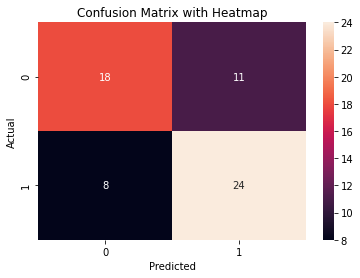

In [20]:
#11: Visualize the confusion matrix with a Heatmap

ax = plt.axes()
ax.set_title('Confusion Matrix with Heatmap')
sns.heatmap(confusion_matrix, annot=True)